In [1]:
# Cell 1 — imports & data load
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Used a mobile phone or the internet to pay bills in world.csv")
df.head()

,AREA_LABEL,SEX_LABEL,AGE_LABEL,URBANISATION_LABEL,COMP_BREAKDOWN_1_LABEL,COMP_BREAKDOWN_3_LABEL,TIME_PERIOD,OBS_VALUE,OBS_STATUS,OBS_STATUS_LABEL
0,Afghanistan,Total,15 years old and over,Total,Total,Total,2017,0.262964,A,Normal value
1,Albania,Total,15 years old and over,Total,Total,Total,2017,1.599317,A,Normal value
2,Algeria,Total,15 years old and over,Total,Total,Total,2017,2.148515,A,Normal value
3,Argentina,Total,15 years old and over,Total,Total,Total,2017,12.661557,A,Normal value
4,Armenia,Total,15 years old and over,Total,Total,Total,2017,10.723854,A,Normal value


In [2]:
# Cell 2 — basic cleaning
df = df[df["OBS_STATUS"] == "A"].copy()               # keep only normal values
df["TIME_PERIOD"] = df["TIME_PERIOD"].astype(int)   # 2017, 2021, 2022
df["OBS_VALUE"] = pd.to_numeric(df["OBS_VALUE"], errors="coerce")

In [3]:
# Cell 3 — quick sanity check
print("Shape after cleaning:", df.shape)
print("Countries:", df["AREA_LABEL"].nunique())
print("Years:", sorted(df["TIME_PERIOD"].unique()))

Shape after cleaning: (3142, 10)
Countries: 163
Years: [np.int64(2017), np.int64(2021), np.int64(2022), np.int64(2024)]


In [4]:
# Cell 4 — top 10 countries 2021 (total adults)
top2021 = (df[(df["TIME_PERIOD"] == 2021) & 
              (df["SEX_LABEL"] == "Total") & 
              (df["COMP_BREAKDOWN_1_LABEL"] == "Total") &
              (df["AGE_LABEL"] == "15 years old and over")]
           .sort_values("OBS_VALUE", ascending=False)
           .head(10)[["AREA_LABEL", "OBS_VALUE"]])

top2021

,AREA_LABEL,OBS_VALUE
2920,Finland,95.722667
2353,Finland,94.476093
2465,Norway,93.123439
3032,Norway,92.434287
2347,Estonia,91.522601
2507,Sweden,90.842043
2914,Estonia,89.740828
2946,Iceland,89.522820
2413,Latvia,88.491364
185,Finland,88.450464


/tmp/ipykernel_90332/1092578610.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="AREA_LABEL", x="OBS_VALUE", data=top2021, palette="Blues_r")


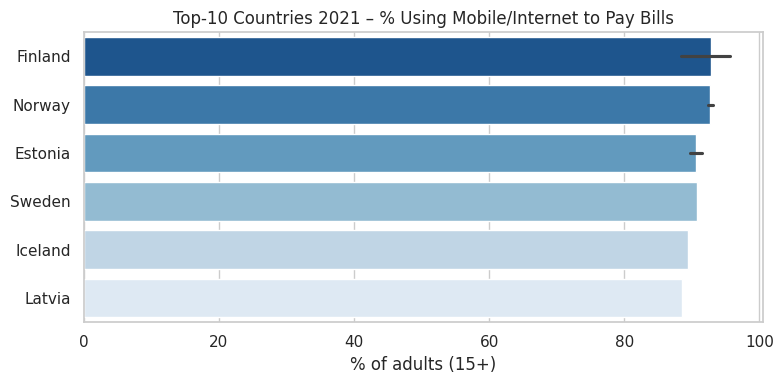

In [9]:
top2021 = (df[(df["TIME_PERIOD"] == 2021) &
              (df["SEX_LABEL"] == "Total") &
              (df["COMP_BREAKDOWN_1_LABEL"] == "Total") &
              (df["AGE_LABEL"] == "15 years old and over")]
           .sort_values("OBS_VALUE", ascending=False)
           .head(10))

plt.figure(figsize=(8,4))
sns.barplot(y="AREA_LABEL", x="OBS_VALUE", data=top2021, palette="Blues_r")
plt.title("Top-10 Countries 2021 – % Using Mobile/Internet to Pay Bills")
plt.xlabel("% of adults (15+)")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [5]:
# Cell 5 — fastest growers 2017->2021 (total adults)
base = (df[(df["SEX_LABEL"] == "Total") & 
           (df["COMP_BREAKDOWN_1_LABEL"] == "Total") &
           (df["AGE_LABEL"] == "15 years old and over")])
pivot = base.pivot_table(index="AREA_LABEL", 
                         columns="TIME_PERIOD", 
                         values="OBS_VALUE")
pivot["growth"] = pivot[2021] - pivot[2017]
pivot.sort_values("growth", ascending=False).head(10)

TIME_PERIOD,2017,2021,2022,2024,growth
AREA_LABEL,,,,,
Greece,15.028360,57.111227,NaN,NaN,42.082867
Thailand,9.735018,45.437683,NaN,40.744612,35.702665
Brazil,10.085885,38.694308,NaN,50.825446,28.608423
Mongolia,12.216578,39.675103,NaN,52.605006,27.458525
Saudi Arabia,25.897772,52.147073,NaN,47.440062,26.249301
Gabon,14.300106,40.490045,NaN,37.902096,26.189938
Kazakhstan,18.358757,44.459623,NaN,46.976859,26.100866
Chile,20.494787,44.845387,NaN,NaN,24.350600
Russian Federation,32.113964,56.326777,NaN,NaN,24.212814


/tmp/ipykernel_90332/3863427762.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TIME_PERIOD", y="OBS_VALUE", data=base, palette="Set2")


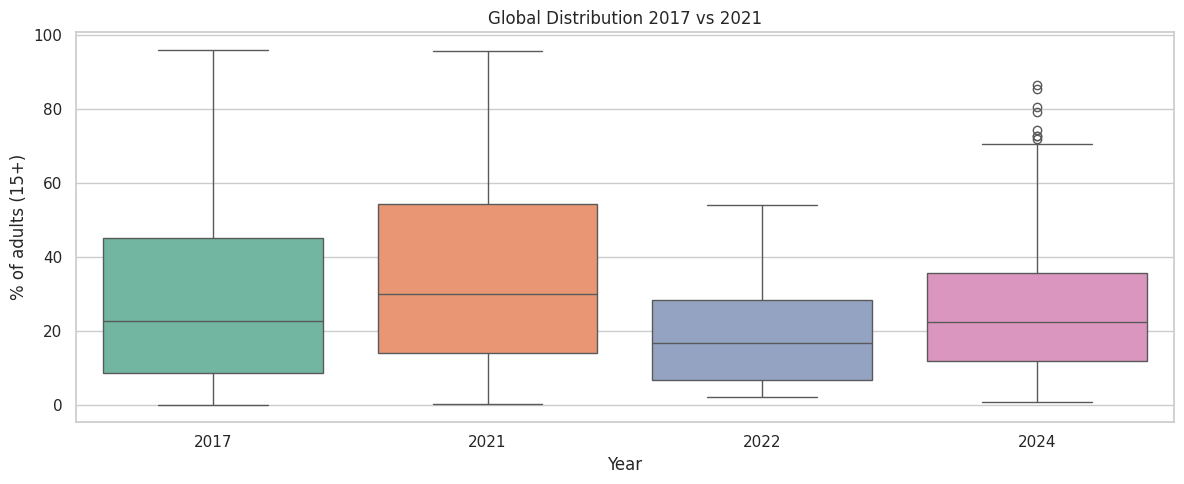

In [11]:
base = (df[(df["SEX_LABEL"] == "Total") &
           (df["COMP_BREAKDOWN_1_LABEL"] == "Total") &
           (df["AGE_LABEL"] == "15 years old and over")])

plt.figure(figsize=(12,5))
sns.boxplot(x="TIME_PERIOD", y="OBS_VALUE", data=base, palette="Set2")
plt.title("Global Distribution 2017 vs 2021")
plt.xlabel("Year")
plt.ylabel("% of adults (15+)")
plt.tight_layout()
plt.show()

In [6]:
# Cell 6 — gender gap 2021 (example)
gap = (df[(df["TIME_PERIOD"] == 2021) & 
          (df["SEX_LABEL"].isin(["Male", "Female"])) &
          (df["COMP_BREAKDOWN_1_LABEL"] == "Total") &
          (df["AGE_LABEL"] == "15 years old and over")]
       .pivot_table(index="AREA_LABEL", 
                    columns="SEX_LABEL", 
                    values="OBS_VALUE"))
gap["gap_abs"] = gap["Male"] - gap["Female"]
gap.sort_values("gap_abs", ascending=False).head(10)

SEX_LABEL,Female,Male,gap_abs
AREA_LABEL,,,
Turkiye,27.757018,56.018832,28.261814
Saudi Arabia,48.841789,70.960034,22.118245
Portugal,35.455267,56.374782,20.919514
"Iran, Islamic Rep.",26.613165,44.817404,18.204240
Slovenia,47.125828,65.090574,17.964746
Lithuania,52.779421,70.050630,17.271209
Cote d'Ivoire,10.606895,27.501359,16.894464
Brazil,34.263666,50.587511,16.323845
Kenya,37.636309,52.577229,14.940920


/tmp/ipykernel_90332/1517280496.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=gap.index, x="gap_abs", data=gap, palette="Reds_r")


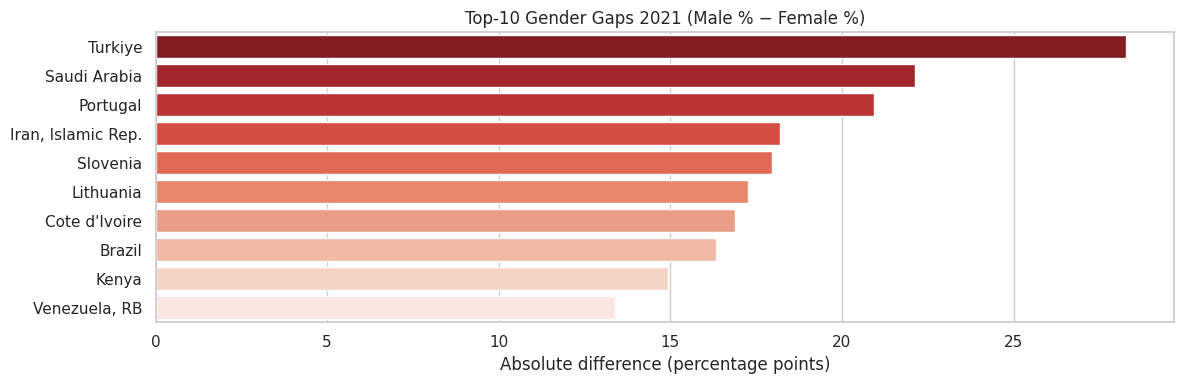

In [13]:
gap = (df[(df["TIME_PERIOD"] == 2021) &
          (df["SEX_LABEL"].isin(["Male", "Female"])) &
          (df["COMP_BREAKDOWN_1_LABEL"] == "Total") &
          (df["AGE_LABEL"] == "15 years old and over")]
       .pivot_table(index="AREA_LABEL", columns="SEX_LABEL", values="OBS_VALUE")
       .dropna())

gap["gap_abs"] = gap["Male"] - gap["Female"]
gap = gap.sort_values("gap_abs", ascending=False).head(10)

plt.figure(figsize=(12,4))
sns.barplot(y=gap.index, x="gap_abs", data=gap, palette="Reds_r")
plt.title("Top-10 Gender Gaps 2021 (Male % − Female %)")
plt.xlabel("Absolute difference (percentage points)")
plt.ylabel("")
plt.tight_layout()
plt.show()

/tmp/ipykernel_90332/1512270003.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_growth.index, x="growth", data=top_growth, palette="Purples_r")


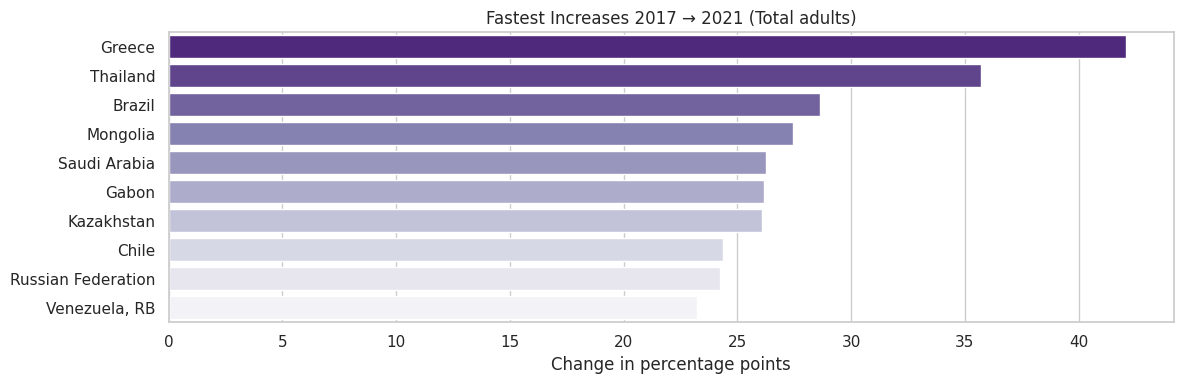

In [18]:
pivot = base.pivot_table(index="AREA_LABEL", columns="TIME_PERIOD", values="OBS_VALUE")
pivot = pivot.dropna(subset=[2017, 2021])
pivot["growth"] = pivot[2021] - pivot[2017]
top_growth = pivot.sort_values("growth", ascending=False).head(10)

plt.figure(figsize=(12,4))
sns.barplot(y=top_growth.index, x="growth", data=top_growth, palette="Purples_r")
plt.title("Fastest Increases 2017 → 2021 (Total adults)")
plt.xlabel("Change in percentage points")
plt.ylabel("")
plt.tight_layout()
plt.show()

/tmp/ipykernel_90332/656631153.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="COMP_BREAKDOWN_1_LABEL", y="OBS_VALUE", data=brazil, palette="Greens")


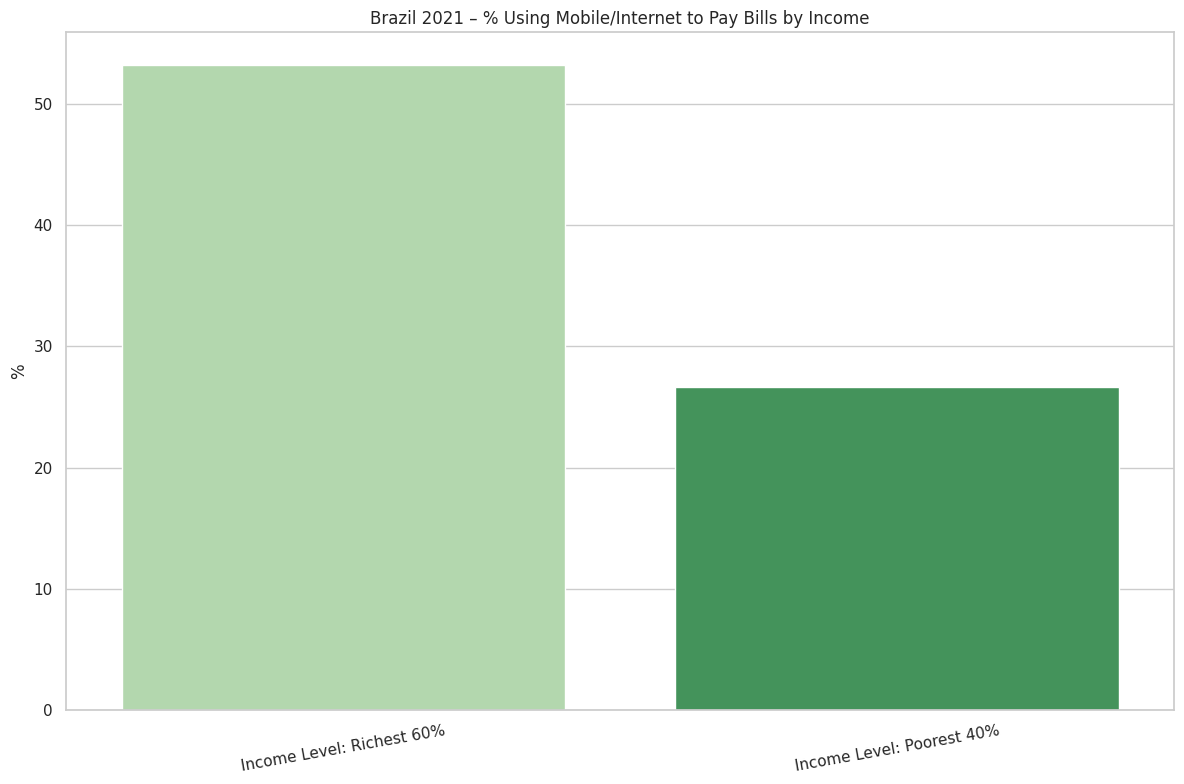

In [19]:
brazil = (df[(df["AREA_LABEL"] == "Brazil") &
             (df["TIME_PERIOD"] == 2021) &
             (df["COMP_BREAKDOWN_1_LABEL"].str.contains("Income Level"))])

plt.figure(figsize=(12,8))
sns.barplot(x="COMP_BREAKDOWN_1_LABEL", y="OBS_VALUE", data=brazil, palette="Greens")
plt.title("Brazil 2021 – % Using Mobile/Internet to Pay Bills by Income")
plt.ylabel("%")
plt.xlabel("")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()